### Simple workflow with Graph

In [70]:
def function3(input3):
    return input3

In [71]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    output = function3(" this is function 3 in between ")
    return input2 + " " + output + " and Startship from second function "

In [72]:
from langgraph.graph import Graph

In [73]:
workflow1=Graph()

In [74]:
workflow1.add_node("function1", function1)


In [75]:
workflow1.add_node("function2", function2)

In [76]:
workflow1.add_edge("function1", "function2")

In [77]:
workflow1.set_entry_point("function1")

In [78]:
workflow1.set_finish_point("function2")

In [79]:
app1=workflow1.compile()

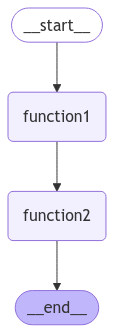

In [80]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))

except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [81]:
app1.invoke("hi this is bob ")

'hi this is bob from first function  this is function 3 in between  and Startship from second function '

In [82]:
input = "tuesday is the sixth flight test "

In [83]:
for output in app1.stream(input):
    for key,value in  output.items():
        print(f"here is output from {key}")
        print("------------")
        print(value)
        print("\n")

here is output from function1
------------
tuesday is the sixth flight test from first function


here is output from function2
------------
tuesday is the sixth flight test from first function  this is function 3 in between  and Startship from second function 




## Creating workflow with llm

In [5]:
import os

In [6]:
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
LANGCHAIN_TRACING_V2 = os.getenv("LANGCHAIN_TRACING_V2")
LANGCHAIN_ENDPOINT = os.getenv("LANGCHAIN_ENDPOINT")
LANGCHAIN_API_KEY = os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT = os.getenv("LANGCHAIN_PROJECT")
SERPER_API_KEY = os.getenv("SERPER_API_KEY")
GROQ_API_KEY = os.getenv("GROQ_API_KEY")
HUGGINGFACE_API_KEY = os.getenv("HUGGINGFACE_API_KEY")

In [7]:
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = LANGCHAIN_TRACING_V2
os.environ["LANGCHAIN_ENDPOINT"] = LANGCHAIN_ENDPOINT
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_PROJECT"] = LANGCHAIN_PROJECT
os.environ["SERPER_API_KEY"] = SERPER_API_KEY
os.environ["GROQ_API_KEY"] = GROQ_API_KEY
os.environ["HUGGINGFACE_API_KEY"] = HUGGINGFACE_API_KEY

In [88]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

c:\Users\mailm\Documents\langgraph-end-to-end\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [89]:
llm.invoke("hi").content

'Hi! 👋 How can I help you today? 😊\n'

In [90]:
def function1(input):
    llm=ChatGroq(model_name="llama3-groq-70b-8192-tool-use-preview")
    response=llm.invoke(input).content
    return response

In [91]:
def function2(input):
    upper_case=input.upper()
    return upper_case

In [15]:
from langgraph.graph import Graph
workflow2=Graph()


In [93]:
workflow2.add_node("llm",  function1)

In [94]:
workflow2.add_node("upper_string", function2)

In [95]:
workflow2.add_edge("llm", "upper_string")

In [96]:
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [97]:
app2=workflow2.compile()

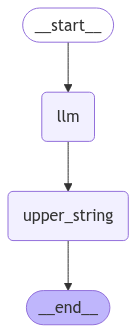

In [98]:
from IPython.display  import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))

except Exception  as e:
    # This requires some extra dependencies and is optional
    print(e)

In [99]:
app2.invoke("What is machine learning")

'MACHINE LEARNING IS A BRANCH OF ARTIFICIAL INTELLIGENCE THAT INVOLVES THE USE OF ALGORITHMS AND STATISTICAL MODELS TO ENABLE MACHINES TO LEARN FROM DATA, MAKE DECISIONS, AND IMPROVE THEIR PERFORMANCE ON A GIVEN TASK OVER TIME. IT IS A TYPE OF ARTIFICIAL INTELLIGENCE THAT ALLOWS SYSTEMS TO AUTOMATICALLY IMPROVE THEIR PERFORMANCE BASED ON EXPERIENCE.\n\nMACHINE LEARNING ALGORITHMS ARE DESIGNED TO IDENTIFY PATTERNS IN DATA AND USE THESE PATTERNS TO MAKE PREDICTIONS OR DECISIONS. THEY CAN BE TRAINED ON VARIOUS TYPES OF DATA, SUCH AS IMAGES, TEXT, AUDIO, AND MORE. THE GOAL OF MACHINE LEARNING IS TO ENABLE MACHINES TO PERFORM TASKS THAT WOULD TYPICALLY REQUIRE HUMAN INTELLIGENCE, SUCH AS IMAGE RECOGNITION, NATURAL LANGUAGE PROCESSING, AND DECISION-MAKING.\n\nTHERE ARE SEVERAL TYPES OF MACHINE LEARNING ALGORITHMS, INCLUDING:\n\n1. **SUPERVISED LEARNING**: IN THIS TYPE OF MACHINE LEARNING, THE ALGORITHM IS PROVIDED WITH LABELED DATA, WHERE EACH EXAMPLE IS ACCOMPANIED BY A TARGET OR RESPONSE V

In [101]:
input="What is the nvidia isaacsim"

In [102]:
for output in app2.stream(input):
    for key, value in output.items():
        print(f"here is output from {key}")
        print("---------------")
        print(value)
        print("\n")

here is output from llm
---------------
NVIDIA IsaacSim is a virtual simulation environment designed to train and test AI models for robotics and autonomous systems. It allows users to simulate various scenarios and environments, which can be used to train AI models to make decisions in complex situations.

IsaacSim is part of the NVIDIA Isaac SDK, which is a collection of tools and libraries for developing and deploying AI models in robotics and autonomous systems. The SDK includes various components such as perception, manipulation, and navigation, among others.

IsaacSim provides several features that make it useful for training and testing AI models, including:

1. **Simulation of various environments**: IsaacSim can simulate different environments, such as warehouses, hospitals, or homes, allowing users to train AI models in various scenarios.
2. **Physics-based simulation**: The simulator uses physics-based models to simulate real-world interactions accurately, which helps in tra

### Creating own output token counter

In [103]:
def function3(input):
    token=input.split()
    token_number = len(token)
    token_number=f"total token number is {token_number}"
    return token_number

In [104]:
workflow3=Graph()
workflow3.add_node("llm", function1)
workflow3.add_node("token_counter", function3)
workflow3.add_edge("llm", "token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3=workflow3.compile()

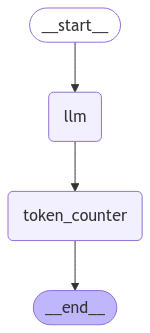

In [105]:
from IPython.display  import Image, display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))

except Exception  as e:
    # This requires some extra dependencies and is optional
    print(e)

In [106]:
app3.invoke("What is full name of trump")

'total token number is 3'

### Integrating RAG pipeline

In [8]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

c:\Users\mailm\Documents\langgraph-end-to-end\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
llm.invoke("hi").content

'Hello! 👋  How can I help you today? 😊\n'

In [9]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma 
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import PyPDFLoader


In [10]:


# Load documents from the data directory
loader = DirectoryLoader("../data", glob="*.pdf", loader_cls=PyPDFLoader)
docs = loader.load()

# Split documents into chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200
)
new_docs = text_splitter.split_documents(documents=docs)

# Check if documents were loaded successfully
if not new_docs:
    print("No documents were found or split. Please check your data directory and files.")
    exit()

# Create document strings
doc_strings = [doc.page_content for doc in new_docs]

# Create vector store
db = Chroma.from_documents(new_docs, embeddings)
retriever = db.as_retriever(search_kwargs={"k": 3})

# Perform query
query = "What is self attention?"
docs = retriever.get_relevant_documents(query)

# Print results
if docs:
    print(f"\nFound {len(docs)} relevant documents")
    
    print("\nFirst document metadata:")
    print(docs[0].metadata)
    
    print("\nFirst document content:")
    print(docs[0].page_content)
    
    print("\nAll documents:")
    for i, doc in enumerate(docs, 1):
        print(f"\nDocument {i}:")
        print("Metadata:", doc.metadata)
        print("Content:", doc.page_content)
        print("-" * 50)
else:
    print("No relevant documents found for the query.")

C:\Users\mailm\AppData\Local\Temp\ipykernel_16892\2987748473.py:26: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)



Found 3 relevant documents

First document metadata:
{'page': 2, 'source': '..\\data\\attention.pdf'}

First document content:
3.2 Attention
An attention function can be described as mapping a query and a set of key-value pairs to an output,
where the query, keys, values, and output are all vectors. The output is computed as a weighted sum
3

All documents:

Document 1:
Metadata: {'page': 2, 'source': '..\\data\\attention.pdf'}
Content: 3.2 Attention
An attention function can be described as mapping a query and a set of key-value pairs to an output,
where the query, keys, values, and output are all vectors. The output is computed as a weighted sum
3
--------------------------------------------------

Document 2:
Metadata: {'page': 5, 'source': '..\\data\\attention.pdf'}
Content: P Epos.
We also experimented with using learned positional embeddings [9] instead, and found that the two
versions produced nearly identical results (see Table 3 row (E)). We chose the sinusoidal version
becau

In [26]:
def function_1(AgentState):
    messages=AgentState["messages"]
    question = messages[-1]

    complete_prompt = "Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    AgentState['messages'].append(response.content) 
    return AgentState


In [27]:
def function_2(AgentState):
    messages = AgentState['messages']
    question = messages[0]

    template = """Answer the question based only on the following context:
    {context}

    Question:  {question}
"""

    prompt = ChatPromptTemplate.from_template(template)
    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm 
        | StrOutputParser()
    )
    result = retrieval_chain.invoke(question)
    return  result 

In [28]:
workflow4 = Graph()
workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)
workflow4.add_edge("LLM", "RAGtool")
workflow4.set_entry_point("LLM")
workflow4.set_finish_point("RAGtool")
app4 = workflow4.compile()


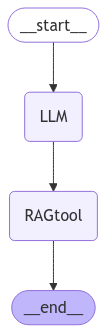

In [29]:
from IPython.display  import Image, display

try:
    display(Image(app4.get_graph().draw_mermaid_png()))

except Exception  as e:
    # This requires some extra dependencies and is optional
    print(e)

In [30]:
inputs = {"messages": ["Tell me about the self attention layer"]}

In [31]:
for output in app4.stream(inputs):

    for key, value in output.items():
        print(f"Output from node '{key}': ")
        print("-----------")
        print(value)
    print("\n----\n")

Output from node 'LLM': 
-----------
{'messages': ['Tell me about the self attention layer', 'Self-attention layers allow a model to weigh the importance of different parts of an input sequence when processing it.  They enable the model to understand relationships between words in a sentence, regardless of their distance. \n\n']}

----

Output from node 'RAGtool': 
-----------
Self-attention layers are faster than recurrent layers for computational complexity, especially when dealing with long sequences. 

They are used for mapping one variable-length sequence of symbol representations to another sequence of equal length. 

The text mentions three key points about self-attention:

1. **Computational Complexity:** Self-attention requires O(n^2) sequential operations, while recurrent layers require O(n) sequential operations. However, self-attention can be parallelized more effectively, making it faster in practice for longer sequences.
2. **Positional Embeddings:** The text discusses us